# https://www.kaggle.com/c/digit-recognizer/
# with keras + resnet, scored 0.9785714285714285
# refer to https://github.com/broadinstitute/keras-resnet

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [2]:
# load csv files to numpy arrays

def load_data():
    train = pd.read_csv("train.csv")
    X_train = train.values[:,1:] 
    y_train = train.values[:,0]
    
    Pred_test = pd.read_csv("test.csv").values
    return X_train, y_train, Pred_test

def flush_predictons(predictions, output_name='out.csv'):
    '''
    predictions is a np.array of int 
    '''
    imgs = pd.Series(range(1,pred_test.shape[0]+1))
    imgd = pd.DataFrame(imgs)
    
    labeld = pd.DataFrame(predictions)
    out = pd.concat([imgd, labeld],axis=1)
    out.columns = ["ImageId", "Label"]
    out.to_csv(output_name, index = False)
    
x_train, y_train, pred_test = load_data()

In [3]:
print(x_train.shape, y_train.shape, pred_test.shape)

(42000, 784) (42000,) (28000, 784)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size=0.8, random_state=0)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(33600, 784) (33600,) (8400, 784) (8400,)


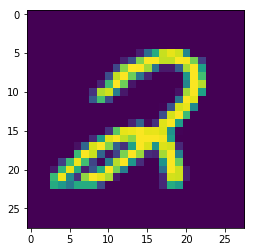

In [5]:
plt.imshow(x_train[4].reshape(28, 28))

In [6]:
from keras import models, layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten, ZeroPadding2D, BatchNormalization
from keras.optimizers import RMSprop

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
# data preprocessing for keras CNN
x_train = x_train.reshape(x_train.shape[0], 28,28,1).astype('float32')/255
x_test  = x_test.reshape(x_test.shape[0], 28,28,1).astype('float32')/255
pred_test = pred_test.reshape(pred_test.shape[0], 28,28,1).astype('float32')/255

In [8]:
batch_size = 64
num_classes = 10
epochs = 20
pool_size=(2,2)

In [9]:
# one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(33600, 28, 28, 1) (33600, 10) (8400, 28, 28, 1) (8400, 10)


In [11]:
import keras_resnet.models

In [19]:
x = keras.layers.Input(shape=(28,28,1,))
model = keras_resnet.models.ResNet18(x, classes=num_classes)

In [20]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
padding_conv1 (ZeroPadding2D)   (None, 34, 34, 1)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 14, 14, 64)   3136        padding_conv1[0][0]              
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 14, 14, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu

In [21]:
# resolve tensorflow error: CUBLAS_STATUS_ALLOC_FAILED
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto(
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.6)
    # device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
set_session(session)

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer="adam",#RMSprop(),
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=80,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 33600 samples, validate on 8400 samples
Epoch 1/80
33600/33600 [==============================] - 14s 429us/step - loss: 0.0113 - acc: 0.9982 - val_loss: 0.0747 - val_acc: 0.9894
Epoch 2/80
33600/33600 [==============================] - 12s 355us/step - loss: 0.0102 - acc: 0.9986 - val_loss: 0.0988 - val_acc: 0.9893
Epoch 3/80
33600/33600 [==============================] - 12s 354us/step - loss: 0.0196 - acc: 0.9965 - val_loss: 0.0712 - val_acc: 0.9902
Epoch 4/80
33600/33600 [==============================] - 12s 353us/step - loss: 0.0096 - acc: 0.9984 - val_loss: 0.0836 - val_acc: 0.9900
Epoch 5/80
33600/33600 [==============================] - 12s 354us/step - loss: 0.0086 - acc: 0.9984 - val_loss: 0.0942 - val_acc: 0.9885
Epoch 6/80
33600/33600 [==============================] - 12s 354us/step - loss: 0.0152 - acc: 0.9971 - val_loss: 0.0859 - val_acc: 0.9863
Epoch 7/80
33600/33600 [==============================] - 12s 354us/step - loss: 0.0184 - acc: 0.9966 - val_loss: 0.1

Epoch 59/80
33600/33600 [==============================] - 12s 354us/step - loss: 4.7997e-04 - acc: 1.0000 - val_loss: 0.0963 - val_acc: 0.9912
Epoch 60/80
33600/33600 [==============================] - 12s 353us/step - loss: 4.7993e-04 - acc: 1.0000 - val_loss: 0.0972 - val_acc: 0.9913
Epoch 61/80
33600/33600 [==============================] - 12s 354us/step - loss: 4.7990e-04 - acc: 1.0000 - val_loss: 0.0981 - val_acc: 0.9914
Epoch 62/80
33600/33600 [==============================] - 12s 354us/step - loss: 4.7989e-04 - acc: 1.0000 - val_loss: 0.0986 - val_acc: 0.9914
Epoch 63/80
33600/33600 [==============================] - 12s 354us/step - loss: 4.7987e-04 - acc: 1.0000 - val_loss: 0.0996 - val_acc: 0.9914
Epoch 64/80
33600/33600 [==============================] - 12s 353us/step - loss: 4.7986e-04 - acc: 1.0000 - val_loss: 0.0999 - val_acc: 0.9913
Epoch 65/80
33600/33600 [==============================] - 12s 353us/step - loss: 4.7986e-04 - acc: 1.0000 - val_loss: 0.1006 - val_acc:

In [30]:
pred = model.predict(pred_test)
pred = np.argmax(pred, axis=1)

In [33]:
flush_predictons(pred, output_name='keras_resnet.csv')

In [34]:
pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [35]:
model.save("keras_resnet.h5")

In [34]:
from keras.models import load_model

model = load_model("keras_resnet.h5")